# GSL Urugual - January 2020

# Week - 3 | Lesson - 1

-----

# Computer Vision and Applications to Health Care

## Goals:

1. In this lesson, we will learn to work with images 
2. We start with the basics and build up quickly to solve important problems in Health Care

## Methods:
1. Convolutional Neural Networks 

---

# Getting started with Images using MNIST

----

# 0. Import modules

In [3]:
# =========================================================
# import python modules
# =========================================================

# working directory
import os

EC2 = True  # If using EC2 (for data directory/paths)

# Select path based off of local or remote
if not EC2:
    wd = "/home/ubuntu/projects/gsl-uruguay/w03/"
else:
    wd = "/home/ubuntu/machine_learning_aws/"
    
os.chdir(wd)

os.chdir(wd)

# data manipulation
import pandas as pd
import numpy as np

# scipy images
from scipy.ndimage import rotate
# from scipy.misc import imread, imshow

# models
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# parallel processing
import multiprocessing
from joblib import delayed, Parallel

# plotting
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

# time code
import time

# error metric
from sklearn.metrics import accuracy_score

In [4]:
# =========================================================
# import keras modules
# =========================================================

# working with images
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import backend as K

# keras layers
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.models import model_from_json

# optimization routines
from keras import optimizers
from keras.utils import np_utils

# resnet 50
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.models import Model

Using TensorFlow backend.
/home/ubuntu/conda/envs/conda_env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ubuntu/conda/envs/conda_env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ubuntu/conda/envs/conda_env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ubuntu/conda/envs

In [5]:
# =========================================================
# notebook options
# =========================================================

# pandas viewing options
pd.set_option('display.max_rows', 1000)

# number of cpus
cpus = multiprocessing.cpu_count()
f"Number of CPUs: {cpus}"

'Number of CPUs: 4'

----

# 0.1 Data structure

In [4]:
# =========================================================
# data directory for MNIST
# =========================================================

data_dir = "data/mnist/"
print(os.listdir(data_dir))

['mnist_images', 'mnist_train.csv', 'mnist_test.csv']


In [5]:
# =========================================================
# training files
# =========================================================

train_dir = "data/mnist/mnist_images/train/"
print(os.listdir(train_dir))

['8', '4', '6', '0', '5', '3', '7', '9', '1', '2']


In [6]:
# =========================================================
# test files
# =========================================================

test_dir = "data/mnist/mnist_images/test/"
print(os.listdir(test_dir))

['8', '4', '6', '0', '5', '3', '7', '9', '1', '2']


In [7]:
# structure within train directory
os.listdir(train_dir + "/1")[:5]

['47224.png', '42546.png', '36422.png', '22179.png', '14327.png']

In [8]:
# structure within train directory
os.listdir(train_dir + "/3")[:5]

['49435.png', '16715.png', '35349.png', '17207.png', '33344.png']

----

# 1. Explore data

## 1.1. Example images

In [9]:
# example image
i1 = load_img(train_dir + "/1" + "/47224.png")
i1

In [10]:
# example image
file_path = train_dir + "3/"
i2 = load_img(file_path + os.listdir(file_path)[10])
i2

In [11]:
# example image
i3 = load_img(file_path + os.listdir(file_path)[100])
i3

In [12]:
# check size
print(i1.size)
print(i2.size)
print(i3.size)

(28, 28)
(28, 28)
(28, 28)


## 1.2. Plot images directly from file

In [13]:
#===============================================
# plot pictures from file
#===============================================
def PicturesFromPaths(image_paths):
    plt_pic = plt.figure(figsize = (14, 7))
    for i in range(len(image_paths)):
        sb_plt = plt_pic.add_subplot(1, len(image_paths), i + 1)
        sb_plt.axis("Off")
        plt.imshow(load_img(image_paths[i]))

In [14]:
file_path = test_dir + "8/"
sample_image_paths = [file_path + x for x in os.listdir(file_path)[0:5]]
sample_image_paths

['data/mnist/mnist_images/test/8/4879.png',
 'data/mnist/mnist_images/test/8/2905.png',
 'data/mnist/mnist_images/test/8/4058.png',
 'data/mnist/mnist_images/test/8/474.png',
 'data/mnist/mnist_images/test/8/6826.png']

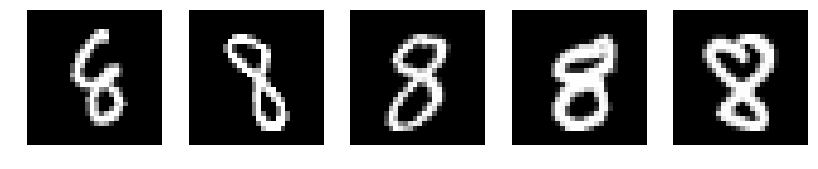

In [15]:
PicturesFromPaths(image_paths = sample_image_paths)

In [16]:
file_path = test_dir + "2/"
sample_image_paths = [file_path + x for x in os.listdir(file_path)[0:5]]
sample_image_paths

['data/mnist/mnist_images/test/2/3239.png',
 'data/mnist/mnist_images/test/2/5053.png',
 'data/mnist/mnist_images/test/2/830.png',
 'data/mnist/mnist_images/test/2/3785.png',
 'data/mnist/mnist_images/test/2/9779.png']

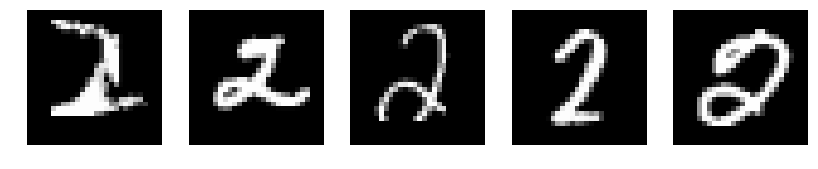

In [17]:
PicturesFromPaths(image_paths = sample_image_paths)

----

## 1.2. Under the hood

In [18]:
# sample image
i3

In [19]:
# image size
i3.size

(28, 28)

In [20]:
# array size
np.array(i3).shape

(28, 28, 3)

In [21]:
# total dimensions
np.array(i3).shape[0]*np.array(i3).shape[1]

784

In [22]:
np.array(i3)[0, :, :].shape

(28, 3)

In [23]:
np.array(i3)[:, 0, :].shape

(28, 3)

In [24]:
np.array(i3)[0, 0, :].shape

(3,)

In [25]:
np.array(i3)[:, :, 0].shape

(28, 28)

In [26]:
np.array(i3)[5]

array([[  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [179, 179, 179],
       [245, 245, 245],
       [ 37,  37,  37],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0]], dtype=uint8)

In [27]:
np.array(i3)[5:8]

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [179, 179, 179],
        [245, 245, 245],
        [ 37,  37,  37],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]

In [28]:
np.array(i3)[:, :, 0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 179, 245,  37,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

----

## 1.3. Operations on Images

In [29]:
# example image
file_path = train_dir + "4/"
i4 = load_img(file_path + os.listdir(file_path)[10])
i4

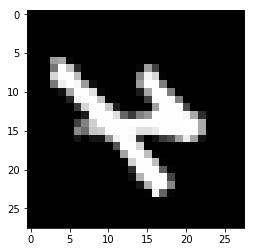

In [30]:
# mirror images
mirror = np.fliplr(i4)
plt.imshow(mirror);

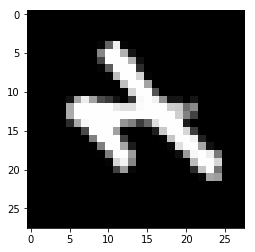

In [31]:
# vertical flip
updown = np.flipud(i4)
plt.imshow(updown);

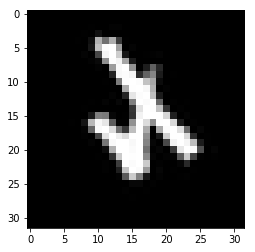

In [32]:
# rotate image by 80'
rot = rotate(i4, 80)
plt.imshow(rot);

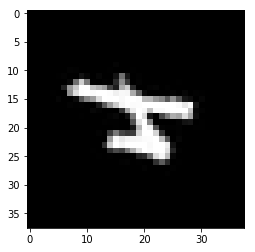

In [33]:
# rotate image by 120'
rot = rotate(i4, 120)
plt.imshow(rot);

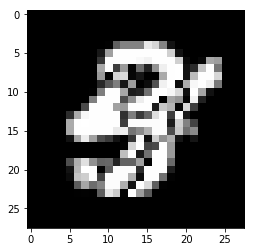

In [34]:
# add two images
add_img = np.array(i3) + np.array(i4)
plt.imshow(add_img);

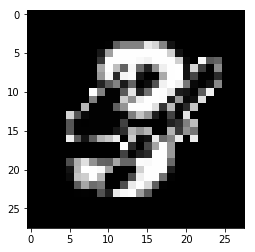

In [35]:
# subtract two images
sub_img = np.array(i3) - np.array(i4)
plt.imshow(sub_img);

-----

# 2. Predict handwritten digits

## 2.1. Import csv files

In [36]:
### Back to familiary territory
train = pd.read_csv("data/mnist/mnist_train.csv", header = None)
print(train.shape)

(60000, 785)


In [37]:
display(train.head())

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
# frequency distribution of each label
train.loc[:, 0].value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: 0, dtype: int64

In [39]:
# test data set
test = pd.read_csv("data/mnist/mnist_test.csv", header = None)
print(test.shape)

(10000, 785)


In [40]:
test.loc[:, 0].value_counts()

1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
Name: 0, dtype: int64

----

## 2.2. Exploration

In [41]:
# get mean and std of each pixel
px_mean = train.loc[:,1:].mean()

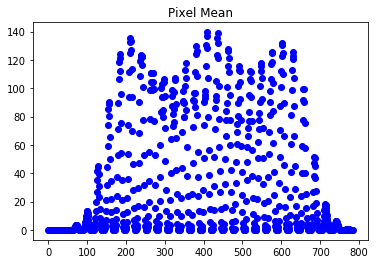

In [42]:
# plot mean
plt.plot(px_mean, "bo")
plt.title("Pixel Mean");

-----

# 3. Models

## 3.1. Data prep

In [43]:
# convert train data frames to matrices
X_train = train.loc[:, 1:]
y_train = train.loc[:, 0]
print(X_train.shape)
print(y_train.shape)

(60000, 784)
(60000,)


In [44]:
# convert test data frames to matrices
X_test = test.loc[:, 1:]
y_test = test.loc[:, 0]
print(X_test.shape)
print(y_test.shape)

(10000, 784)
(10000,)


-----

## 3.2. Penalized regression

In [45]:
log_reg_1 = LogisticRegression(C = 1e2, multi_class = "multinomial", solver = "lbfgs")
log_reg_1.fit(X_train, y_train)

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [46]:
# predict on test data
log_reg_1_pred_prob = pd.DataFrame(log_reg_1.predict_proba(X_test))
print(log_reg_1_pred_prob.shape)

(10000, 10)


In [47]:
log_reg_1_pred_prob.head()

,0,1,2,3,4,5,6,7,8,9
0,1.078072e-06,7.225768e-14,0.000002,0.001916,6.068616e-08,0.000004,6.629599e-12,9.975812e-01,0.000023,4.730211e-04
1,8.434144e-05,7.402071e-08,0.996472,0.000768,5.154252e-17,0.001618,9.899442e-04,5.779535e-20,0.000068,2.808325e-15
2,1.834059e-07,9.862905e-01,0.007233,0.001342,3.248439e-05,0.000140,4.518673e-04,3.692041e-04,0.003992,1.480475e-04
3,9.998932e-01,7.516692e-14,0.000021,0.000002,9.888238e-09,0.000009,6.736464e-05,1.275494e-06,0.000004,2.497095e-06
4,6.449577e-04,1.977011e-09,0.000968,0.000004,9.764068e-01,0.000008,1.123518e-03,8.477584e-04,0.001785,1.821147e-02


In [48]:
# check error
# first predict lables
log_reg_1_pred_label = log_reg_1.predict(X_test)
print(accuracy_score(y_test, log_reg_1_pred_label))

0.9242


### Important pixels

In [49]:
imp_pixels = pd.DataFrame({"var": train.columns[1:], "coef" : log_reg_1.coef_[0,:]})
imp_pixels.reindex(imp_pixels.coef.abs().sort_values(ascending = False).index).head(10)

,coef,var
461,-0.004839,462
434,-0.004655,435
408,-0.003993,409
379,-0.003864,380
351,-0.003801,352
360,0.003695,361
406,-0.003486,407
712,-0.003456,713
323,-0.003398,324
629,0.003360,630


## Another penalized regression

In [50]:
# build model
log_reg_2 = LogisticRegression(C = 1e1, max_iter = 75, multi_class = "multinomial", solver = "lbfgs")
log_reg_2.fit(X_train, y_train)

# check error
log_reg_2_pred_label = log_reg_2.predict(X_test)
print(accuracy_score(y_test, log_reg_2_pred_label))

0.924


-----

## 3.3. Principal components regression

### Fit PCA with 2-components

In [51]:
# fit PCA to pixels
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train)
print(X_train_pca.shape)

(60000, 2)


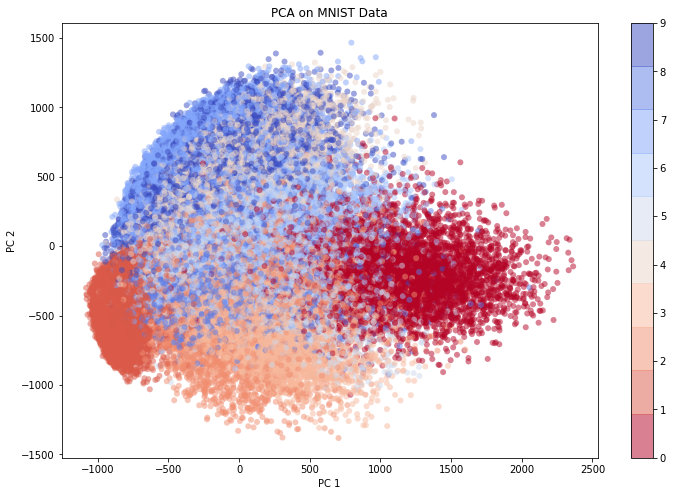

In [52]:
plt_pic = plt.figure(figsize = (12, 8))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1],
            c = y_train, edgecolor = "none", alpha = 0.5,
            cmap = plt.cm.get_cmap("coolwarm_r", 10))
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title("PCA on MNIST Data")
plt.colorbar();

In [53]:
# fit PCA to pixels
pca = PCA(n_components = 300)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)
print(X_test_pca.shape)

(60000, 300)
(10000, 300)


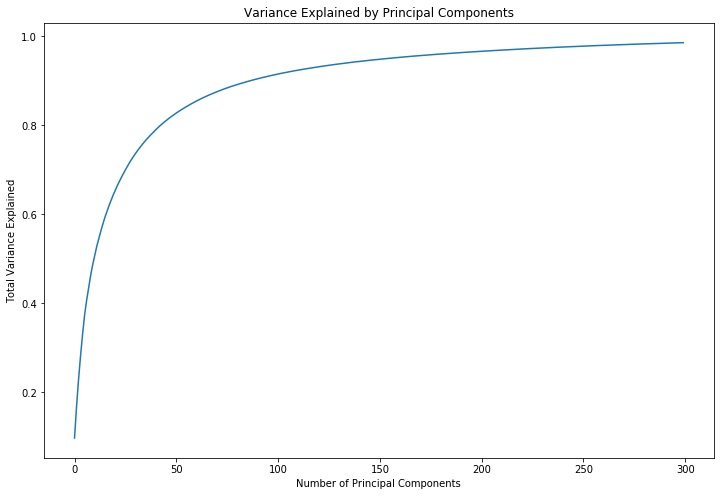

In [54]:
# proportion of variance explained
plt_pic = plt.figure(figsize = (12, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Total Variance Explained')
plt.title("Variance Explained by Principal Components");

In [55]:
# fit Logistic regression to principal components
log_reg_3 = LogisticRegression(C = 1e10, multi_class = "multinomial", solver = "lbfgs")
log_reg_3.fit(X_train_pca, y_train)

LogisticRegression(C=10000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=1, penalty='l2',
          random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
          warm_start=False)

In [56]:
# check accuracy
log_reg_3_pred_label = log_reg_3.predict(X_test_pca)
print(accuracy_score(y_test, log_reg_3_pred_label))

0.9217


-----

## 3.4. K-Nearest Neighbours

In [57]:
# important to scale the data
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [58]:
# fit knn
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_sc, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [59]:
# predict using knn
#knn_pred = knn.predict(X_test_sc)
#print(accuracy_score(y_test, knn_pred))

0.9452


### Choosing K

In [62]:
# fit PCA to pixels
pca = PCA(n_components = 20)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)
print(X_test_pca.shape)

(60000, 20)
(10000, 20)


In [63]:
knn_error = []

# Calculating error for K values between 1 and 40
for i in range(1, 10):
    print(i)
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train_pca, y_train)
    knn_pred = knn.predict(X_test_pca)
    knn_error.append(accuracy_score(y_test, knn_pred))

1
2
3
4
5
6
7
8
9


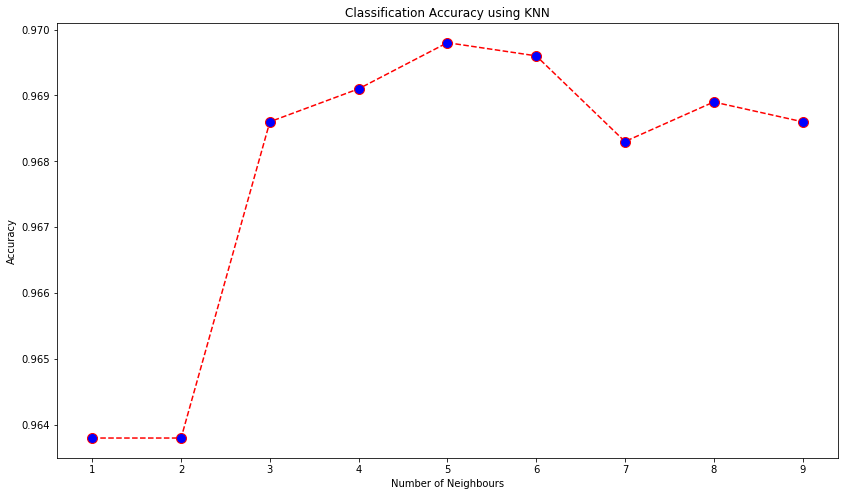

In [68]:
plt.figure(figsize = (14, 8))
plt.plot(range(1, 10), knn_error, color = "red", 
         linestyle = "dashed", marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Classification Accuracy using KNN')
plt.xlabel('Number of Neighbours')
plt.ylabel('Accuracy');

-----

# Fully Connected Neural Network

## Prepare data

In [73]:
# =========================================================
# lables
# =========================================================

# one-hot encoding to labels
y_train_cat = np_utils.to_categorical(y_train) 
print(y_train_cat.shape)
print(y_train_cat)

(60000, 10)
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [78]:
# total number of classes
num_classes = y_train_cat.shape[1]
print(num_classes)

# dimensions of input matrix
input_shape = X_train_sc.shape[1]
print(input_shape)

10
784


In [81]:
# =========================================================
# define keras model
# =========================================================

fcn_1 = Sequential() # calling the sequential api
fcn_1.add(Dense(32, input_dim = input_shape)) # 32 unit hidden layer
fcn_1.add(Activation("relu")) # non-linear activation function
fcn_1.add(Dense(num_classes)) # total number of outputs depends on the number of classes 
fcn_1.add(Activation("softmax")) # compress output between 0-1

In [82]:
# =========================================================
# compile model
# =========================================================

fcn_1.compile(loss = "categorical_crossentropy", # loss function - same as that for a logistic regression
              optimizer = optimizers.RMSprop(), # optimizer - RMSProp: normalizes parameter update
              metrics = ["acc"]) # store and observe model accuracy while training

In [83]:
# =========================================================
# model summary
# =========================================================

fcn_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 32)                25120     
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [88]:
# =========================================================
# train model
# =========================================================

t0 = time.time()
fcn_1.fit(X_train_sc, y_train_cat, 
          epochs = 10, 
          batch_size = 16, 
          validation_split = 0.1, 
          verbose = 2)
t1 = time.time()
print("-----------------")
print(f"Time taken: {t1 - t0}")

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
 - 6s - loss: 0.1289 - acc: 0.9749 - val_loss: 0.2115 - val_acc: 0.9625
Epoch 2/10
 - 6s - loss: 0.1217 - acc: 0.9756 - val_loss: 0.2320 - val_acc: 0.9588
Epoch 3/10
 - 6s - loss: 0.1173 - acc: 0.9771 - val_loss: 0.2241 - val_acc: 0.9612
Epoch 4/10
 - 6s - loss: 0.1176 - acc: 0.9779 - val_loss: 0.2367 - val_acc: 0.9630
Epoch 5/10
 - 6s - loss: 0.1121 - acc: 0.9787 - val_loss: 0.2428 - val_acc: 0.9593
Epoch 6/10
 - 6s - loss: 0.1085 - acc: 0.9795 - val_loss: 0.2379 - val_acc: 0.9613
Epoch 7/10
 - 6s - loss: 0.1050 - acc: 0.9801 - val_loss: 0.2441 - val_acc: 0.9630
Epoch 8/10
 - 6s - loss: 0.1021 - acc: 0.9809 - val_loss: 0.2607 - val_acc: 0.9627
Epoch 9/10
 - 6s - loss: 0.0993 - acc: 0.9816 - val_loss: 0.2626 - val_acc: 0.9617
Epoch 10/10
 - 6s - loss: 0.0962 - acc: 0.9815 - val_loss: 0.2653 - val_acc: 0.9598
-----------------
Time taken: 62.7556791305542


In [87]:
# predict on test data
fcn_1_pred = fcn_1.predict_classes(X_test_sc, verbose = 0)
print(accuracy_score(y_test, fcn_1_pred))

0.955


-----